# Modul 1 - FIR Filterentwurf

![prism](img/prism.gif "segment")

## Inhalt  
- [Inverse DTFT](#1.-Inverse-DTFT)  
- [Inverse DFT](#2.-Inverse-DFT)  

---- 

Ein FIR-Filter (Finite Impulse Response) ist ein Filter, dessen Impulsantwort (oder Antwort auf eine Eingabe mit endlicher Länge) von endlicher Dauer ist, da sie sich in endlicher Zeit auf Null einstellt. Dies steht im Gegensatz zu IIR-Filtern (Infinite Impulse Response), die interne Rückkopplungen aufweisen und möglicherweise unbegrenzt weiter reagieren (normalerweise abklingend). Die Entwurfsmethoden umfassen Least MSE, Minimax, Frequenzabtastung usw. Hier diskutieren wir über Frequenzabtastung mittels inverser Fourier-Transformation.

## 1. Inverse DTFT

Die diskrete Zeit-Fourier-Transformation (DTFT) arbeitet mit aperiodischen, diskreten Signalen. Stellen Sie sich vor, Sie erfassen ein N-Abtastsignal und möchten dessen Frequenzspektrum ermitteln. Mit der DFT kann das Signal in Sinus- und Cosinuswellen zerlegt werden, wobei die Frequenzen gleichmäßig zwischen Null und der Hälfte der Abtastrate liegen. Wie im letzten Kapitel erläutert, verlängert das Auffüllen des Zeitbereichssignals mit Nullen die Periode des Zeitbereichs und verringert den Abstand zwischen Abtastwerten im Frequenzbereich. Wenn sich N der Unendlichkeit nähert, wird der Zeitbereich aperiodisch und der Frequenzbereich wird ein kontinuierliches Signal. Dies ist die DTFT, die Fourier-Transformation, die ein aperiodisches, diskretes Signal mit einem periodischen, kontinuierlichen Frequenzspektrum in Beziehung setzt.

Um Impulsantwort eines Filters zu berechnen, können wir die Inverse DTFT benutzen. Nach Definition gilt:  
\begin{equation*}
x(k)=\frac{1}{2\pi}\int_{-\pi}^{\pi}X(j\omega)e^{jk\omega}d\omega 
\end{equation*}  
Hier entwerfen wir einen Hochpassfilter:

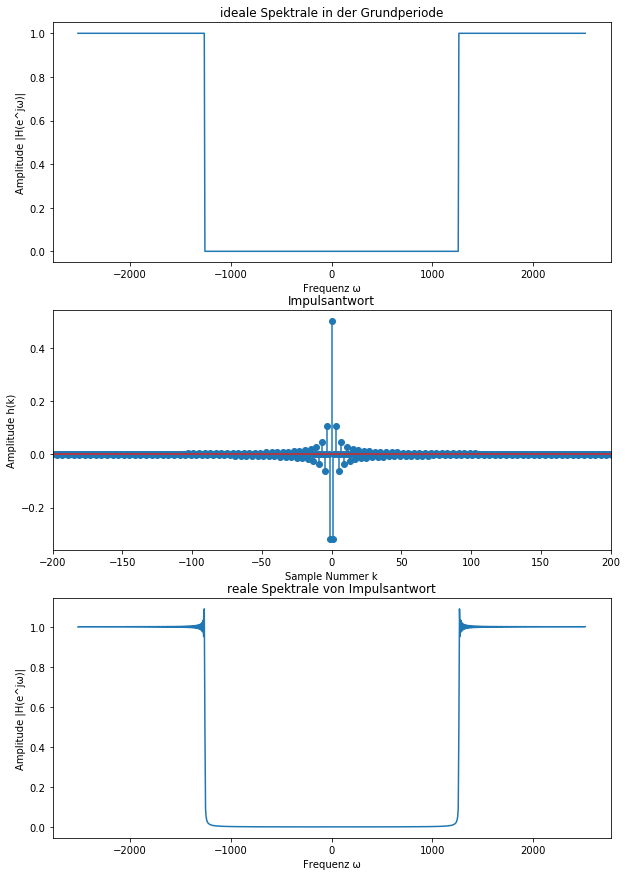

In [1]:
'''
Beispiel: Endliche Impulsantwort eines Hochpassfilters mittels inverser DTFT
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import fftpack

# Initialisierung
fs = 800 
tau = np.pi*400
A = 1  # Amplitude 
h = []  # Impulsantwort

# ideale Spectrale
H_soll = 0
w = np.linspace(-np.pi*fs, np.pi*fs, fs)
for i in range(-1, 2):
    H = np.where((w <= i*2*np.pi*fs + 3*tau) & (w >= i*2*np.pi*fs + tau), A, 0)
    H_soll += H
    
# Endliche Impulsantwort (reell) mit IDTFT 
k = np.arange(-fs//2, fs//2)
for i in k:
    an, err = integrate.quad(lambda w:A*np.cos(i*w/fs), tau, 3*tau, limit=fs)
    h.append(an / (2*np.pi*fs))

# reale Spectrale mittels FFT zum Vergleich mit dem idealen 
H_ist = np.fft.fftshift(np.abs(fftpack.fft(h)))
    
# Plot
plt.subplot(311)
plt.title('ideale Spektrale in der Grundperiode')
plt.xlabel('Frequenz ω') 
plt.ylabel('Amplitude |H(e^jω)|') 
plt.plot(w, H_soll)
plt.subplot(312)
plt.title('Impulsantwort') 
plt.xlabel('Sample Nummer k') 
plt.ylabel('Amplitude h(k)') 
plt.xlim(-200, 200)  
plt.stem(k, h, use_line_collection=True)
plt.subplot(313)
plt.title('reale Spektrale von Impulsantwort')
plt.xlabel('Frequenz ω') 
plt.ylabel('Amplitude |H(e^jω)|') 
plt.plot(w, H_ist)

plt.gcf().set_size_inches(10, 15)
plt.show()

Nun können Sie die beschränkte Impulsantwort mit Rechteckfenster auf L Abtastwerte berechnen: 

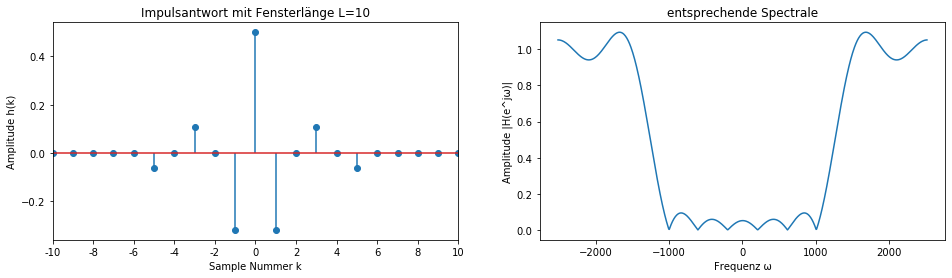

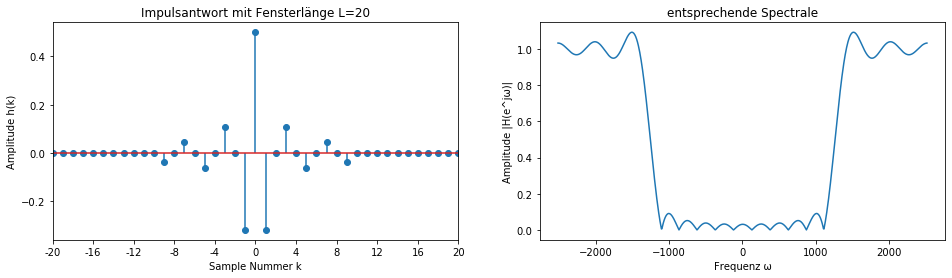

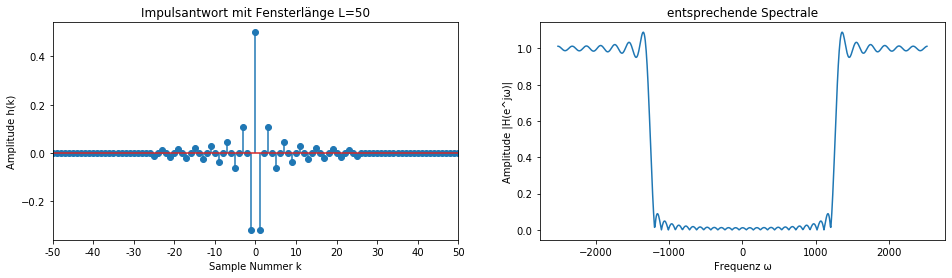

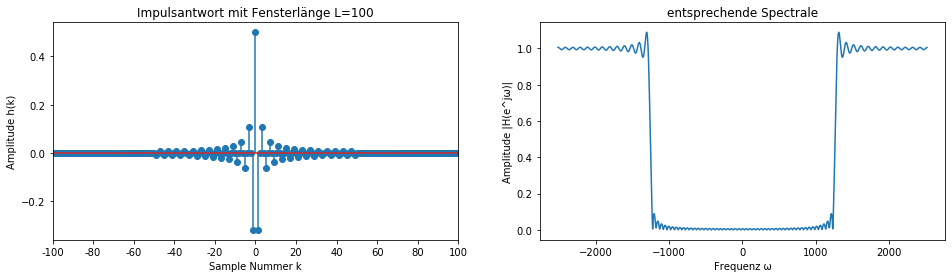

In [2]:
'''
Aufgabe: Beschränkte Impulsantwort mit verschiedenen Fensterlängen L = 10, 20, 50, 200
(Hinweis: Sie können die berechnete Impulsantwort aus dem Beispiel direkt nutzen.)
'''

for L in (10, 20, 50, 100):
    # Fensterung
    hw = np.where((k<=(L//2)) & (k>=(-L//2)), h, 0)
    # Spectralen mittels FFT 
    Hw = np.fft.fftshift(np.abs(fftpack.fft(hw)))

    plt.subplot(121)
    plt.title('Impulsantwort mit Fensterlänge L=%d' %L)
    plt.xlabel('Sample Nummer k') 
    plt.ylabel('Amplitude h(k)') 
    plt.xlim(fs//2-L, fs//2+L)
    plt.xticks(np.arange(fs//2-L, fs//2+L+1, L//5), range(-L, L+1, L//5))
    plt.stem(hw, use_line_collection=True)
    
    plt.subplot(122)
    plt.title('entsprechende Spectrale')
    plt.xlabel('Frequenz ω') 
    plt.ylabel('Amplitude |H(e^jω)|') 
    plt.plot(w, Hw)

    plt.gcf().set_size_inches(16, 4)
    plt.show()

## 2. Inverse DFT

Für nichtperiodische Signale müssen wir jedoch unendlich viele Sinuskurven mit unterschiedlichen Frequenzen verwenden, was für Computer unmöglich zu erreichen ist. Daher kann für die Transformation diskreter Signale nur eine diskrete Fourier-Transformation (DFT) angewendet werden. Für Computer können nur diskrete Daten und Daten endlicher Länge verarbeitet werden. Für andere Arten von Transformationen können sie nur in mathematischen Berechnungen verwendet werden.

Anschließend benutzen wir IDFT für FIR-Filterentwurf. Die Definition der IDFT ist:  
\begin{equation*}
h(k)=\sum_{n=0}^{N-1}H(n)e^{j2\pi kn/N} 
\end{equation*}  
Für DFT gibt es Funktionen [fftpack.fft()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.fft.html) und [fftpack.ifft()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.ifft.html) im scipy-Package zur 1-Periode-DFT Berechnen. Sie können diese einfach benutzen.  
Um die Theorie besser zu verstehen, können Sie aber auch die DFT bzw. IDFT selbst definieren.   
Hier entwerfen wir einen Tiefpassfilter durch selbst definierte IDFT: 

In [3]:
'''
Funktion definieren: idft(func, N)
Impulsantwort mit IDFT, Verschiebung und Fensterung
    
    param func: Funktion für Impulsantwort
    param N: Sample Zahl
''' 
import numpy as np

# IDFT
def idft(func, N):   
    h = [] 
    k = np.arange(N)
    for i in range(N): 
        an = np.sum(func * np.exp(1j*2*np.pi*k*i/N))
        h.append(an)     
    # Verschiebung
    h = np.real(h[N//2:] + h[:N//2])
    # Normalisierung
    h = h / (2*np.max(h))
    return h

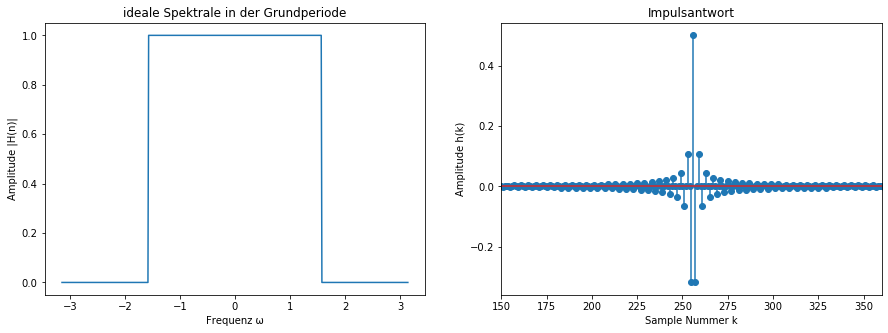

In [4]:
'''
Beispiel: Endliche Impulsantwort eines Tiefpassfilters mittels inverser DFT
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Initialisierung
N = 512  # Sample Zahl
A = 1  # Amplitude 

# Spectrale der Übertragungsfunktion
H_soll = 0
n = np.linspace(-np.pi, np.pi, N)
for i in range(-2, 2):
    H = np.where((n <= i*2*np.pi + np.pi/2) & (n >= i*2*np.pi - np.pi/2), A, 0)
    H_soll += H 

# Impulsantwort
h = idft(H_soll, N)

# plot  
plt.subplot(121)
plt.title('ideale Spektrale in der Grundperiode')
plt.xlabel('Frequenz ω') 
plt.ylabel('Amplitude |H(n)|') 
plt.plot(n, H_soll)
plt.subplot(122)
plt.title('Impulsantwort') 
plt.xlabel('Sample Nummer k') 
plt.ylabel('Amplitude h(k)') 
plt.xlim(150, 360)
plt.stem(np.real(h), use_line_collection=True)
plt.gcf().set_size_inches(15, 5)
plt.show()

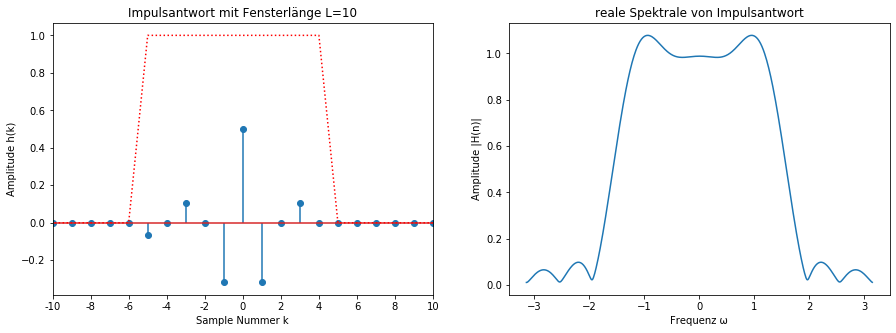

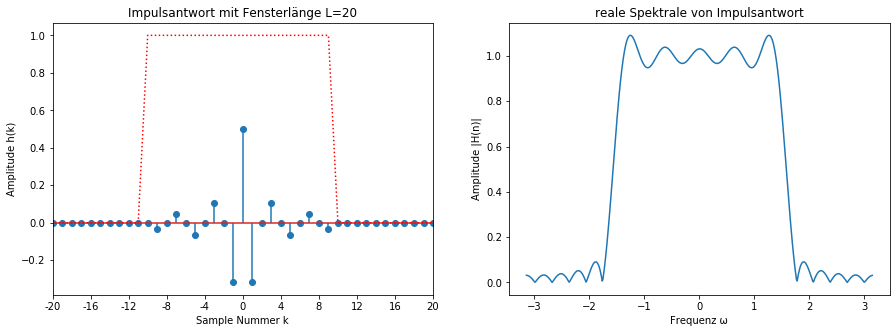

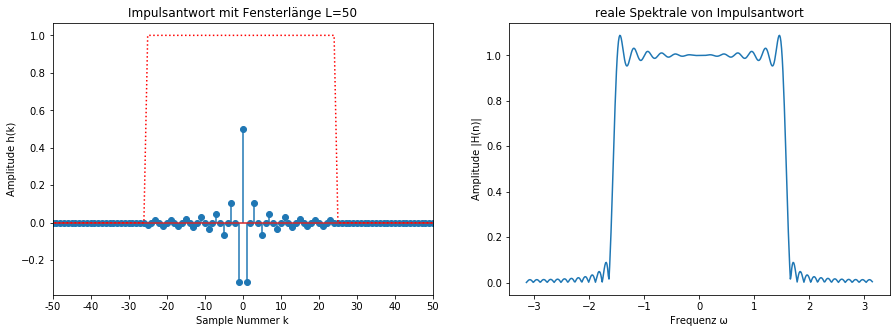

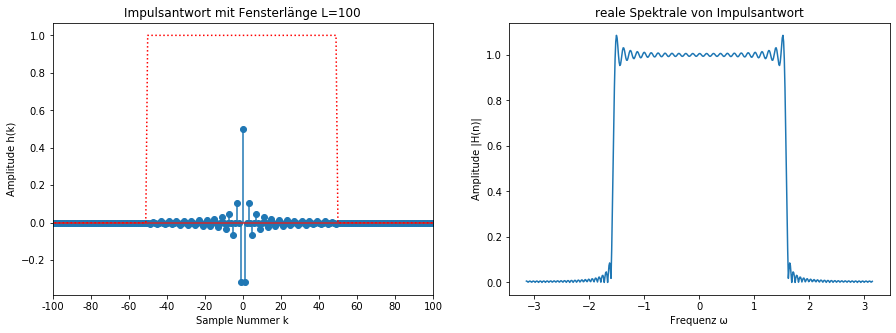

In [5]:
# Fensterung mit verschiedene Länge
from scipy import signal
for L in (10, 20, 50, 100):
    wd = signal.get_window('boxcar', L)
    mask = np.zeros(N)
    mask[(N-L)//2:(N+L)//2] = wd      
    h_ist = h * mask
    # Spectrale mittels fft 
    H_ist = np.abs(fftpack.fft(h_ist))
    # Plot
    plt.subplot(121)
    plt.title('Impulsantwort mit Fensterlänge L=%d' %L)
    plt.xlabel('Sample Nummer k') 
    plt.ylabel('Amplitude h(k)') 
    plt.xlim(N//2-L, N//2+L)
    plt.xticks(np.arange(N//2-L, N//2+L+1, L//5), range(-L, L+1, L//5))
    plt.stem(np.real(h_ist), use_line_collection=True)
    plt.plot(mask, ls=':', c='r')
    plt.subplot(122)
    plt.title('reale Spektrale von Impulsantwort')
    plt.xlabel('Frequenz ω') 
    plt.ylabel('Amplitude |H(n)|') 
    plt.plot(n, H_ist)
    plt.gcf().set_size_inches(15, 5)
    plt.show()

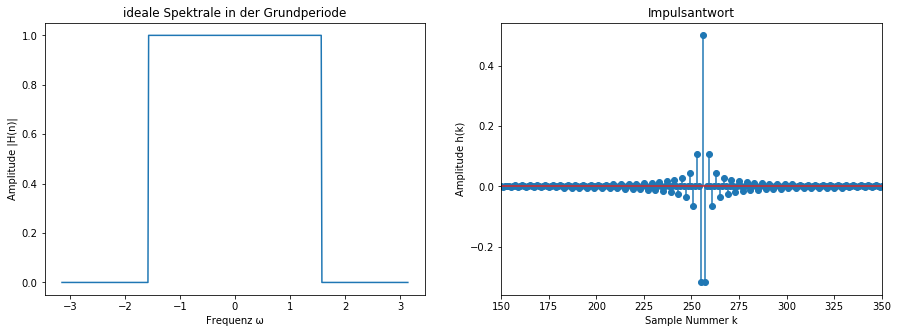

In [6]:
'''
Aufgabe: Endliche Impulsantwort eines Tiefpassfilters mittels ifft
'''
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

# Initialisierung
N = 512  # Sample Zahl
A = 1  # Amplitude 

# Spectrale der Übertragungsfunktion
H_soll = 0
n = np.linspace(-np.pi, np.pi, N)
for i in range(-2, 2):
    H = np.where((n <= i*2*np.pi + np.pi/2) & (n >= i*2*np.pi - np.pi/2), A, 0)
    H_soll += H 
    
# Inpulsantwort mittels ifft, ifftshift 
h = np.fft.ifftshift(fftpack.ifft(H_soll, N))   

# plot  
plt.subplot(121)
plt.title('ideale Spektrale in der Grundperiode')
plt.xlabel('Frequenz ω') 
plt.ylabel('Amplitude |H(n)|') 
plt.plot(n, H_soll)
plt.subplot(122)
plt.title('Impulsantwort') 
plt.xlabel('Sample Nummer k') 
plt.ylabel('Amplitude h(k)') 
plt.xlim(150, 350)
plt.stem(np.real(h), use_line_collection=True)
plt.gcf().set_size_inches(15, 5)
plt.show()

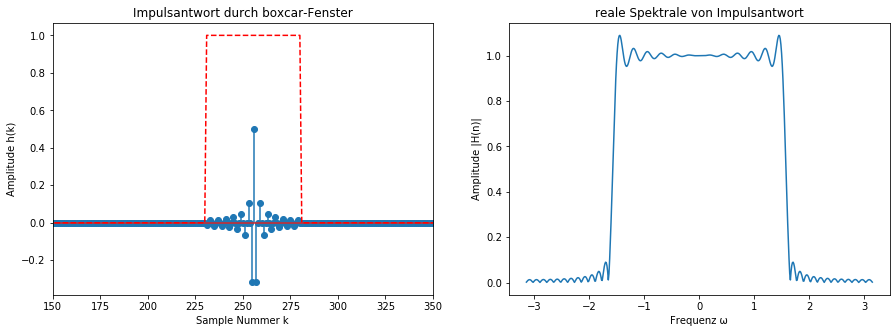

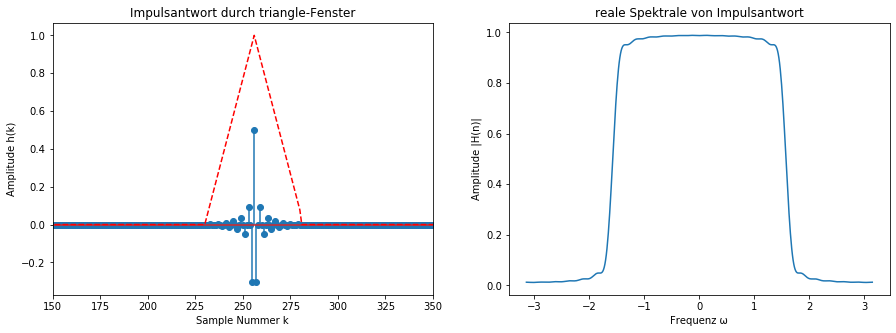

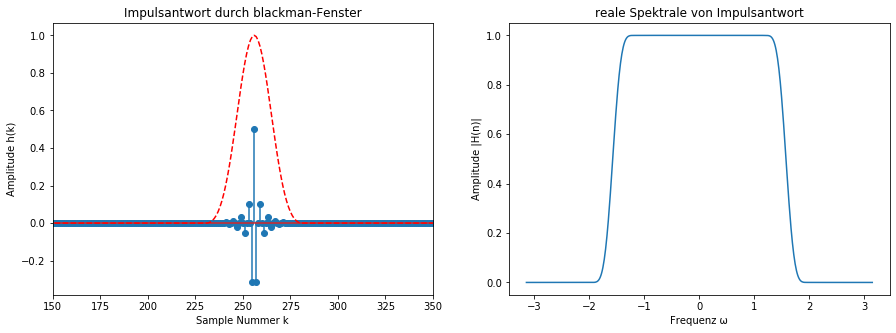

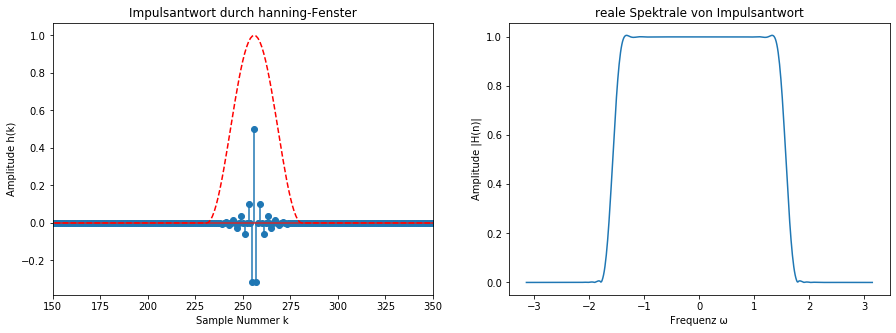

In [7]:
# mit verschiedenen Fenstern
from scipy import signal
L = 50
for wd in ('boxcar', 'triangle', 'blackman', 'hanning'):
    mask = np.zeros(N)
    mask[(N-L)//2:(N+L)//2] = signal.get_window(wd, L)      
    h_ist = h * mask
    # Spectrale mittels fft 
    H_ist = np.abs(fftpack.fft(h_ist))
    # Plot
    plt.subplot(121)
    plt.title('Impulsantwort durch %s-Fenster' %wd) 
    plt.xlabel('Sample Nummer k') 
    plt.ylabel('Amplitude h(k)') 
    plt.xlim(150, 350)
    plt.stem(np.real(h_ist), use_line_collection=True)
    plt.plot(mask, ls='--', c='r')
    plt.subplot(122)
    plt.title('reale Spektrale von Impulsantwort')
    plt.xlabel('Frequenz ω') 
    plt.ylabel('Amplitude |H(n)|') 
    plt.plot(n, H_ist)
    plt.gcf().set_size_inches(15, 5)
    plt.show()

----

### References

1. Titelbild von [Lucas Vieira](https://en.wikipedia.org/wiki/Prism#/media/File:Light_dispersion_conceptual_waves.gif)  
2. DSP Guide: [The Scientist and Engineer's Guide to
Digital Signal Processing](http://www.dspguide.com/pdfbook.htm)